# Paket Prabayar Manakah yang Lebih Baik?

# Pendahuluan

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Kita akan menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan. 
Kita juga akan menguji hipotesis berikut ini:
1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

# Tahap 1 : Ikhtisar Data

## Inisialisasi

In [1]:
# memuat semua library
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy import stats as st

## Memuat Data

In [2]:
# memuat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
message = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Paket Prabayar

Data akan dibagi menjadi beberapa tabel. Kita akan melihat masing-masing informasi tabel dan samplenya untuk mendapatkan pemahaman awal tentang data. 

In [3]:
calls.sample(5)

,id,user_id,call_date,duration
137143,1498_65,1498,2018-10-27,9.21
25789,1099_109,1099,2018-09-09,5.53
97699,1348_548,1348,2018-10-19,0.79
20597,1077_564,1077,2018-01-30,0.00
57147,1203_538,1203,2018-12-06,9.82


In [4]:
calls.info()
calls.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


(137735, 4)

In [5]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
calls.duplicated().sum()

0

In [7]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Dari dataframe di atas diketahui bahwa:
- Terdapat durasi 0.0 yang kemungkinan merupakan panggilan tak terjawab
- user id sebaiknya diubah dalam format object

In [8]:
internet.sample(5)

,id,user_id,session_date,mb_used
1113,1007_97,1007,2018-11-17,0.00
23705,1109_283,1109,2018-12-18,321.58
86585,1402_114,1402,2018-11-01,0.00
46080,1204_13,1204,2018-12-24,469.94
50922,1228_17,1228,2018-11-15,0.00


In [9]:
internet.info()
internet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


(104825, 4)

In [10]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [11]:
internet.duplicated().sum()

0

In [12]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [13]:
message.sample(5)

,id,user_id,message_date
56818,1361_170,1361,2018-10-23
27337,1167_294,1167,2018-06-09
31133,1195_0,1195,2018-11-27
36515,1242_187,1242,2018-12-07
69219,1448_642,1448,2018-11-18


In [14]:
message.info()
message.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


(76051, 3)

In [15]:
message.duplicated().sum()

0

In [16]:
message.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [17]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [18]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [19]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
388,1388,Thu,Noel,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-28,ultimate,NaN
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,NaN
281,1281,Zack,Hardy,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-07-23,surf,2018-11-14
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaN
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaN


In [20]:
users.info()
users.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(500, 8)

In [21]:
users.duplicated().sum()

0

In [22]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

**Kesimpulan sementara Tahap Ikhtisar Data**:
- Format tanggal pada `calls`, `message`, `users`, dan `internet` harus diubah dalam bentuk datetime
- Tidak ada nilai duplikat pada keseluruhan dataframe
- Terdapat nilai yang hilang pada `users` yaitu nilai `churn_date` yang menandakan layanan masih digunakan hingga saat ini 
* Terdapat total 500 user. Namun jumlah panggilan, pesan, dan paket data internet memiliki jauh lebih banyak data






# Pra-Pemrosesan Data

## Memperbaiki Data

Kita akan merubah format tanggal setiap dataframe dari object menjadi datetime untuk memudahkan langkah kita dalam proses analisis data.

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
message['message_date'] = pd.to_datetime(message['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Selanjutnya kita akan membulatkan data megabita menjadi gigabita dengan membuat kolom baru

In [24]:
internet['gb_used'] = (internet['mb_used']/1024).apply(np.ceil).astype(int)
internet

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,1
1,1000_204,1000,2018-12-31,0.00,0
2,1000_379,1000,2018-12-28,660.40,1
3,1000_413,1000,2018-12-26,270.99,1
4,1000_442,1000,2018-12-27,880.22,1
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,1
104821,1499_216,1499,2018-12-30,304.72,1
104822,1499_217,1499,2018-09-22,292.75,1
104823,1499_218,1499,2018-12-07,0.00,0



## Memperkaya Kualitas Data

Format data tanggal di setiap dataframe telah diubah dalam bentuk datetime. Selanjutnya kita akan membuat kolom baru berupa bulan dari aktifitas panggilan, pesan, dan data internet yang terkait agar kita bisa menghitung total aktifitas yang dilakukan pengguna per bulannya.

In [25]:
calls['month'] = calls['call_date'].dt.month_name()

Kemudian kita akan melakukan pembulatan ke atas pada durasi panggilan.

In [26]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

In [27]:
message['month'] = message['message_date'].dt.month_name()

In [28]:
internet['month'] = internet['session_date'].dt.month_name()

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kita akan menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.

In [29]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Mengagregasi Data per Pengguna

Sekarang, karena data yang dimiliki telah bersih, kita akan mengagregasikan data setiap pengguna per periode agar hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.

In [30]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
total_calls = calls.pivot_table(index= ['user_id','month'], values= 'id', aggfunc= 'count')
total_calls.columns =['call_count']
total_calls

call_count
user_id month                
1000    December           16
1001    August             27
        December           56
        November           64
        October            65
...                       ...
1498    September          45
1499    December           65
        November           45
        October            53
        September          41

[2258 rows x 1 columns]

In [31]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
total_mins = calls.pivot_table(index= ['user_id','month'], values= 'duration', aggfunc= 'sum')
total_mins

duration
user_id month              
1000    December        124
1001    August          182
        December        412
        November        426
        October         393
...                     ...
1498    September       363
1499    December        496
        November        308
        October         385
        September       346

[2258 rows x 1 columns]

In [32]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
total_msg = message.pivot_table(index= ['user_id','month'] , values= 'id', aggfunc= 'count')
total_msg.columns = ['msg_count']
total_msg


msg_count
user_id month               
1000    December          11
1001    August            30
        December          44
        November          36
        October           53
...                      ...
1496    December          11
        November          13
        October           18
        September         21
1497    December          50

[1806 rows x 1 columns]

In [33]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
total_data = internet.pivot_table(index= ['user_id','month'], values= 'gb_used', aggfunc= 'sum')
total_data.columns = ['data_used']
total_data


data_used
user_id month               
1000    December           4
1001    August            21
        December          55
        November          49
        October           50
...                      ...
1498    September         52
1499    December          58
        November          43
        October           52
        September         37

[2277 rows x 1 columns]

In [34]:
# Tambahkan informasi paket prabayarnya
plans['gb_per_month_included'] = (plans['mb_per_month_included']/1024)
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Kita akan menyatukan data agregat di atas ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu.

In [35]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)

merged_data = total_calls.merge(total_mins,on=['user_id','month'], how='outer').merge(total_msg,on=['user_id','month'], how='outer').merge(total_data,on=['user_id','month'], how='outer').reset_index()
merged_data

,user_id,month,call_count,duration,msg_count,data_used
0,1000,December,16.0,124.0,11.0,4.0
1,1001,August,27.0,182.0,30.0,21.0
2,1001,December,56.0,412.0,44.0,55.0
3,1001,November,64.0,426.0,36.0,49.0
4,1001,October,65.0,393.0,53.0,50.0
...,...,...,...,...,...,...
2288,1349,October,NaN,NaN,76.0,27.0
2289,1361,May,NaN,NaN,2.0,7.0
2290,1482,October,NaN,NaN,2.0,NaN
2291,1108,December,NaN,NaN,NaN,2.0


Karena format bulan pada tabel di atas masih berupa objek/huruf, kita akan merubahnya dalam bentuk angka(integer) untuk memudahkan proses penggabungan dengan tabel lainnya.



In [36]:
month_labels = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                'September': 9, 'October': 10, 'November': 11, 'December': 12}
merged_data['month'] = merged_data['month'].map(month_labels)
merged_data['month']

0       12
1        8
2       12
3       11
4       10
        ..
2288    10
2289     5
2290    10
2291    12
2292     6
Name: month, Length: 2293, dtype: int64

Selanjutnya kita akan menghitung biaya wajib bulanan pada setiap user yang berlangganan terhitung dari waktu `reg_date` hingga waktu `churn_date`. Jika tidak terdapat nilai `churn_date`, maka akan dihitung hingga bulan terakhir.

In [37]:
# Hitung pendapatan bulanan untuk setiap pengguna

list_ = []
for user in users['user_id']:
    for month in range(1,13):
        list_.append((user, month))

merged_df = pd.DataFrame(list_,columns=['user_id','month'])
merged_df = merged_df.merge(users[['user_id','age','plan','reg_date','churn_date','city']], on='user_id', how='inner')
df_tmp = plans[['plan_name','usd_monthly_pay','messages_included','minutes_included','usd_per_gb','usd_per_message','usd_per_minute','gb_per_month_included']]
df_tmp.columns = ['plan','usd_monthly_pay','messages_included','minutes_included','usd_per_gb','usd_per_message','usd_per_minute','gb_per_month_included']
merged_df = merged_df.merge(df_tmp, on='plan', how='inner')
merged_df['reg_month'] = pd.to_datetime(merged_df['reg_date']).dt.month
merged_df['churn_month'] = pd.to_datetime(merged_df['churn_date']).dt.month

merged_df['actual_monthly_pay'] = merged_df[['month','reg_month','churn_month','usd_monthly_pay']].fillna(13).apply(
    lambda x: x['usd_monthly_pay'] if x['month'] >= x['reg_month'] and x['month'] <= x['churn_month'] else 0,axis=1)

merged_df = merged_df.merge(merged_data, on=['user_id','month'], how='inner')
merged_df

,user_id,month,age,plan,reg_date,churn_date,city,usd_monthly_pay,messages_included,minutes_included,...,usd_per_message,usd_per_minute,gb_per_month_included,reg_month,churn_month,actual_monthly_pay,call_count,duration,msg_count,data_used
0,1000,12,45,ultimate,2018-12-24,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",70,1000,3000,...,0.01,0.01,30.0,12,NaN,70.0,16.0,124.0,11.0,4.0
1,1006,11,73,ultimate,2018-11-27,2018-12-18,"San Francisco-Oakland-Berkeley, CA MSA",70,1000,3000,...,0.01,0.01,30.0,11,12.0,70.0,2.0,10.0,15.0,7.0
2,1006,12,73,ultimate,2018-11-27,2018-12-18,"San Francisco-Oakland-Berkeley, CA MSA",70,1000,3000,...,0.01,0.01,30.0,11,12.0,70.0,9.0,59.0,139.0,62.0
3,1008,10,53,ultimate,2018-08-03,NaT,"Orlando-Kissimmee-Sanford, FL MSA",70,1000,3000,...,0.01,0.01,30.0,8,NaN,70.0,71.0,476.0,21.0,48.0
4,1008,11,53,ultimate,2018-08-03,NaT,"Orlando-Kissimmee-Sanford, FL MSA",70,1000,3000,...,0.01,0.01,30.0,8,NaN,70.0,63.0,446.0,37.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,51,surf,2018-02-04,NaT,"New York-Newark-Jersey City, NY-NJ-PA MSA",20,50,500,...,0.03,0.03,15.0,2,NaN,20.0,39.0,339.0,NaN,56.0
2289,1499,9,37,surf,2018-05-06,NaT,"Orlando-Kissimmee-Sanford, FL MSA",20,50,500,...,0.03,0.03,15.0,5,NaN,20.0,41.0,346.0,NaN,37.0
2290,1499,10,37,surf,2018-05-06,NaT,"Orlando-Kissimmee-Sanford, FL MSA",20,50,500,...,0.03,0.03,15.0,5,NaN,20.0,53.0,385.0,NaN,52.0
2291,1499,11,37,surf,2018-05-06,NaT,"Orlando-Kissimmee-Sanford, FL MSA",20,50,500,...,0.03,0.03,15.0,5,NaN,20.0,45.0,308.0,NaN,43.0


In [38]:
#menghitung kelebihan paket data, durasi, dan total pesan

def cost(row):

    diff_min_call = row['duration'] - row['minutes_included']
    diff_msg =  row['msg_count'] - row['messages_included']
    diff_data =  row['data_used'] - row['gb_per_month_included']
    overlimit_fee = 0
    
    if diff_min_call > 0:
        overlimit_fee += diff_min_call  * row['usd_per_minute']
    
    if diff_msg > 0:
        overlimit_fee += diff_msg * row['usd_per_message']
    
    if diff_data > 0:
        overlimit_fee += diff_data * row['usd_per_gb']
    
    return overlimit_fee

merged_df['overlimit_charged'] = merged_df.apply(lambda row: cost(row), axis=1)
merged_df['monthly_revenue'] = merged_df['actual_monthly_pay'] + merged_df['overlimit_charged']
merged_df.sample(5)


,user_id,month,age,plan,reg_date,churn_date,city,usd_monthly_pay,messages_included,minutes_included,...,gb_per_month_included,reg_month,churn_month,actual_monthly_pay,call_count,duration,msg_count,data_used,overlimit_charged,monthly_revenue
222,1155,3,19,ultimate,2018-02-21,NaT,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",70,1000,3000,...,30.0,2,NaN,70.0,36.0,270.0,34.0,44.0,98.00,168.00
1390,1203,3,50,surf,2018-02-11,NaT,"Boston-Cambridge-Newton, MA-NH MSA",20,50,500,...,15.0,2,NaN,20.0,6.0,40.0,3.0,4.0,0.00,20.00
991,1087,12,45,surf,2018-11-18,NaT,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",20,50,500,...,15.0,11,NaN,20.0,57.0,412.0,47.0,28.0,130.00,150.00
1440,1220,5,26,surf,2018-04-22,2018-10-13,"Cincinnati, OH-KY-IN MSA",20,50,500,...,15.0,4,10.0,20.0,96.0,691.0,32.0,48.0,335.73,355.73
1543,1257,8,61,surf,2018-01-29,NaT,"New York-Newark-Jersey City, NY-NJ-PA MSA",20,50,500,...,15.0,1,NaN,20.0,77.0,512.0,34.0,34.0,190.36,210.36


## Mempelajari Perilaku Pengguna

In [39]:
user_activity = merged_df[['user_id','age','city','month','plan','call_count','duration','msg_count','data_used','monthly_revenue']]
user_activity = user_activity.fillna(0)
user_activity

,user_id,age,city,month,plan,call_count,duration,msg_count,data_used,monthly_revenue
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12,ultimate,16.0,124.0,11.0,4.0,70.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",11,ultimate,2.0,10.0,15.0,7.0,70.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",12,ultimate,9.0,59.0,139.0,62.0,294.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",10,ultimate,71.0,476.0,21.0,48.0,196.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",11,ultimate,63.0,446.0,37.0,56.0,252.0
...,...,...,...,...,...,...,...,...,...,...
2288,1498,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",12,surf,39.0,339.0,0.0,56.0,430.0
2289,1499,37,"Orlando-Kissimmee-Sanford, FL MSA",9,surf,41.0,346.0,0.0,37.0,240.0
2290,1499,37,"Orlando-Kissimmee-Sanford, FL MSA",10,surf,53.0,385.0,0.0,52.0,390.0
2291,1499,37,"Orlando-Kissimmee-Sanford, FL MSA",11,surf,45.0,308.0,0.0,43.0,300.0


In [40]:
#memisahkan data berdasarkan paketnya
data_surf = user_activity[user_activity['plan'] == 'surf']
data_ultimate = user_activity[user_activity['plan'] == 'ultimate']


### Panggilan

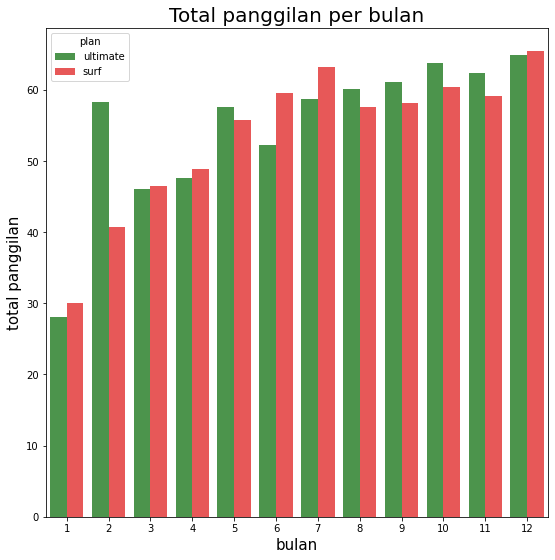

In [42]:
# membandingkan total panggilan setiap paket. 
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=user_activity, x='month', y='call_count', hue='plan', ci=None, palette=['green','red'], alpha=0.75).set_title('Total panggilan per bulan',fontdict={'size': 20})
ax.set_xlabel('bulan',fontdict={'size': 15})
ax.set_ylabel('total panggilan',fontdict={'size': 15})
plt.show()

Dari **diagram batang** di atas diketahui bahwa:
* Bulan Januari memiliki jumlah total panggilan yang paling sedikit dibanding bulan lainnya.
* Semakin berjalannya bulan, total panggilan juga semakin banyak
* Perbedaan jumlah panggilan yang signifikan terjadi pada bulan Februari, namun secara keseluruhan kedua paket tersebut tidak memiliki selisih yang terlalu jauh.

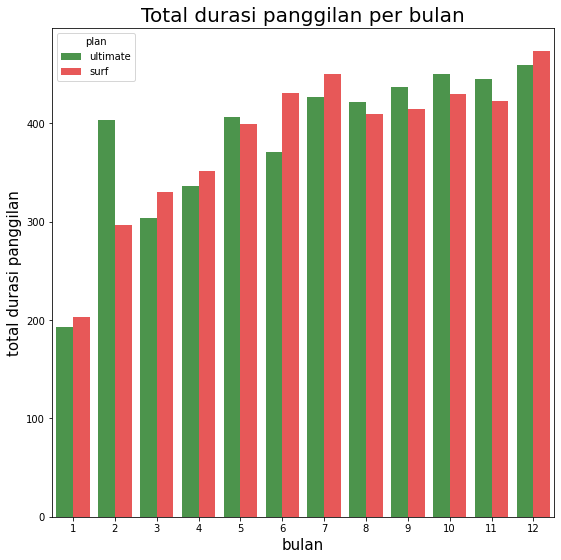

In [43]:
# membandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. 
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=user_activity, x='month', y='duration', hue='plan', ci=None, palette=['green','red'], alpha=0.75).set_title('Total durasi panggilan per bulan',fontdict={'size': 20})
ax.set_xlabel('bulan',fontdict={'size': 15})
ax.set_ylabel('total durasi panggilan',fontdict={'size': 15})
plt.show()

Secara keseluruhan, diagram batang di atas memiliki pola yang mirip dengan diagram total panggilan

In [44]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
user_activity.pivot_table(index='plan', columns='month',values=['call_count'], aggfunc=['mean'])


mean                                                        \
         call_count                                                         
month            1          2          3         4          5          6    
plan                                                                        
surf           30.0  40.666667  46.434783  48.88000  55.701299  59.474227   
ultimate       28.0  58.285714  46.000000  47.52381  57.586207  52.170213   

                                                                            
                                                                            
month            7          8          9          10         11         12  
plan                                                                        
surf      63.157025  57.561728  58.108247  60.350211  59.120141  65.452830  
ultimate  58.694915  60.070423  61.046512  63.783019  62.362205  64.900662

Dari informasi panggilan kedua paket, diperoleh bahwa:
* Rata-rata jumlah panggilan yang dilakukan pengguna paket `surf` pada bulan Desember merupakan yang tertinggi dengan nilai sekitar 65 panggilan
* Rata-rata terendah yaitu pengguna paket `ultimate` pada bulan Januari sekitar 28 panggilan
* Namun jika dilihat secara keseluruhan, paket `ultimate` memiliki rata-rata yang lebih tinggi


In [45]:
user_activity.pivot_table(index='plan', columns='month',values=['duration'], aggfunc=['mean'])

mean                                                          \
         duration                                                           
month          1           2       3           4           5           6    
plan                                                                        
surf        203.0  297.000000  330.00  351.540000  399.584416  431.298969   
ultimate    193.5  403.142857  304.25  336.857143  406.241379  370.957447   

                                                                      \
                                                                       
month             7           8           9           10          11   
plan                                                                   
surf      449.983471  410.111111  414.226804  429.729958  423.325088   
ultimate  427.067797  421.436620  437.511628  450.735849  445.196850   

                      
                      
month             12  
plan                  
surf      473.836478  
ultimate  459.099338

In [46]:
user_activity.pivot_table(index='plan',values=['call_count','duration'], aggfunc=['mean'])

mean            
         call_count    duration
plan                           
surf      59.811825  428.749523
ultimate  60.626389  430.450000

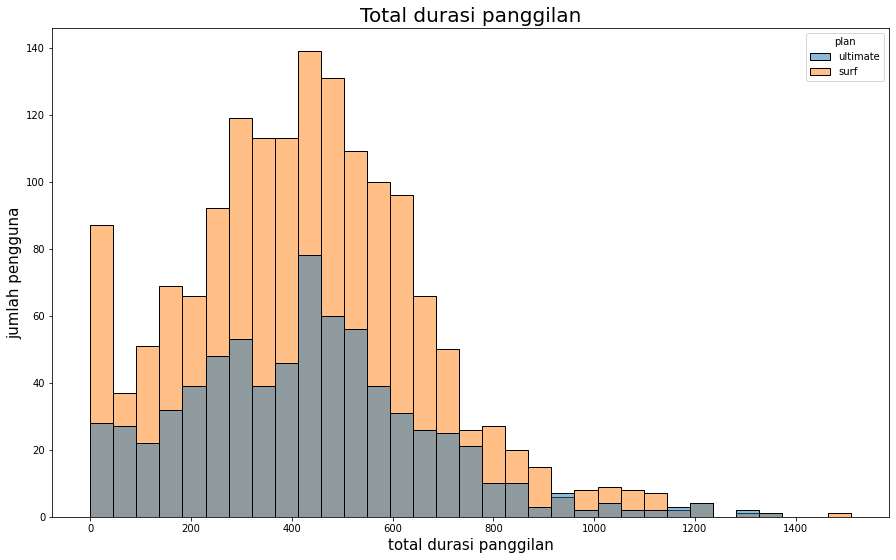

In [69]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(data=user_activity, x='duration', hue='plan').set_title('Total durasi panggilan',fontdict={'size': 20})
ax.set_xlabel('total durasi panggilan',fontdict={'size': 15})
ax.set_ylabel('jumlah pengguna',fontdict={'size': 15})
plt.show()

Dari **histogram** di atas diketahui bahwa:
* Secara keseluruhan, kedua paket memiliki pola persebaran data yang hampir sama, dengan jumlah pengguna paket `surf` yang lebih tinggi karena penggunanya lebih banyak
* Cukup banyak pengguna paket yang melakukan durasi panggilan yang singkat dengan nilai di sekitar **0 menit** yang kemungkinan merupakan panggilan tak terjawab atau memang melakukan panggilan yang singkat dan banyak pengguna yang menghabiskan waktu hingga **450 menit** dalam sebulan untuk durasi panggilannya.
* Tidak banyak nilai setelah nilai 1200 menit, dan paket `ultimate` terlihat memiliki pengguna yang menghabiskan durasi panggilan lebih lama.

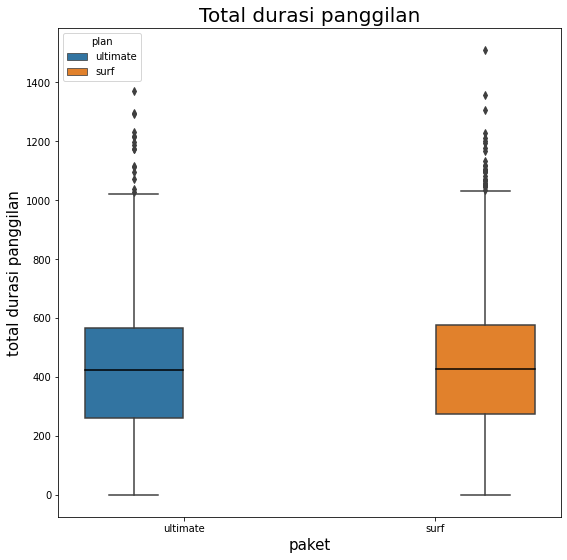

In [99]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.boxplot(data=user_activity, x='plan', y='duration', hue='plan',medianprops={'color': 'black'}).set_title('Total durasi panggilan',fontdict={'size': 20})
ax.set_xlabel('paket',fontdict={'size': 15})
ax.set_ylabel('total durasi panggilan',fontdict={'size': 15})
plt.show()


Dari **boxplot** di atas didapatkan bahwa:
* Median atau nilai tengah dari kedua paket memiliki nilai yang hampir sama
* Kedua paket memiliki rentang persebaran data yang sama
* Beberapa outlier juga terlihat pada kedua paket setelah 1000 menit

Dari **keseluruhan informasi panggilan** kedua paket, diperoleh bahwa:
* Rata-rata durasi panggilan yang dilakukan pengguna paket `surf` pada bulan Desember merupakan yang tertinggi dengan nilai sekitar 474 menit
* Rata-rata terendah yaitu pengguna paket `ultimate` pada bulan Januari sekitar 194 menit
* Namun jika dilihat secara keseluruhan untuk semua bulan, paket `ultimate` memiliki rata-rata durasi yang lebih tinggi


### Pesan

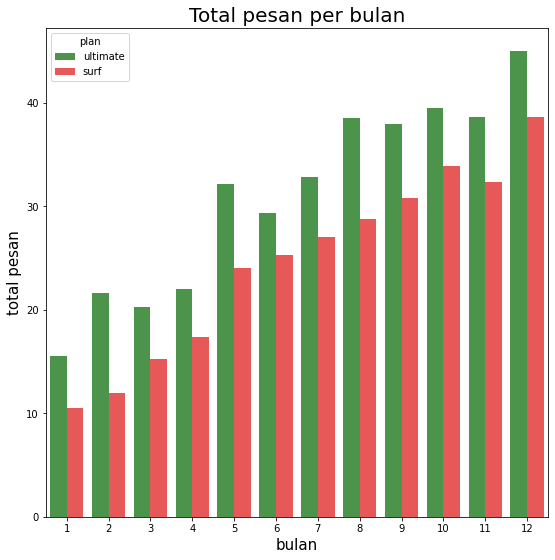

In [49]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=user_activity, x='month', y='msg_count', hue='plan', ci=None, palette=['green','red'], alpha=0.75).set_title('Total pesan per bulan',fontdict={'size': 20})
ax.set_xlabel('bulan',fontdict={'size': 15})
ax.set_ylabel('total pesan',fontdict={'size': 15})
plt.show()

Dari **diagram batang** di atas diketahui bahwa:
* Semakin berjalannya bulan, jumlah pesan yang dikirim meningkat
* Pengguna paket `ultimate` mengirimkan lebih banyak pesan dibandingkan pengguna paket `surf`

In [50]:
user_activity.pivot_table(index='plan', columns='month',values=['msg_count'], aggfunc=['mean'])

mean                                                        \
         msg_count                                                         
month           1          2         3          4          5          6    
plan                                                                       
surf          10.5  12.000000  15.26087  17.400000  24.012987  25.298969   
ultimate      15.5  21.571429  20.25000  22.047619  32.103448  29.340426   

                                                                            
                                                                            
month            7          8          9          10         11         12  
plan                                                                        
surf      27.033058  28.777778  30.762887  33.839662  32.385159  38.600629  
ultimate  32.830508  38.478873  37.895349  39.443396  38.606299  45.006623

In [51]:
user_activity.pivot_table(index='plan',values=['msg_count'], aggfunc=['mean'])

,mean
,msg_count
plan,
surf,31.159568
ultimate,37.551389


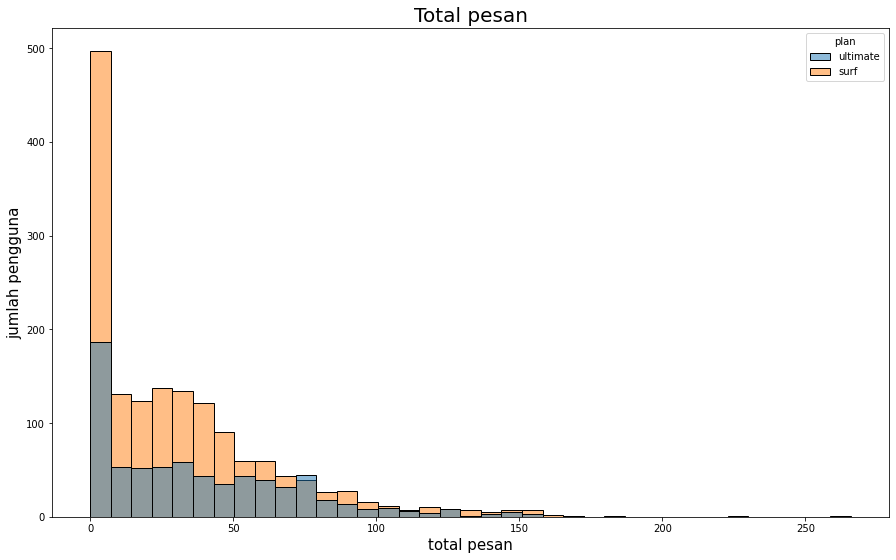

In [94]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(data=user_activity, x='msg_count', hue='plan').set_title('Total pesan',fontdict={'size': 20})
ax.set_xlabel('total pesan',fontdict={'size': 15})
ax.set_ylabel('jumlah pengguna',fontdict={'size': 15})
plt.show()



Dari **histogram** di atas diketahui bahwa:
* Secara keseluruhan, kedua paket memiliki pola persebaran data yang hampir sama, dengan jumlah pengguna paket `surf` yang lebih tinggi karena penggunanya lebih banyak
* Cukup banyak pengguna paket yang mengirimkan hanya sedikit pesan atau bahkan tidak mengirimkan pesan sama sekali 

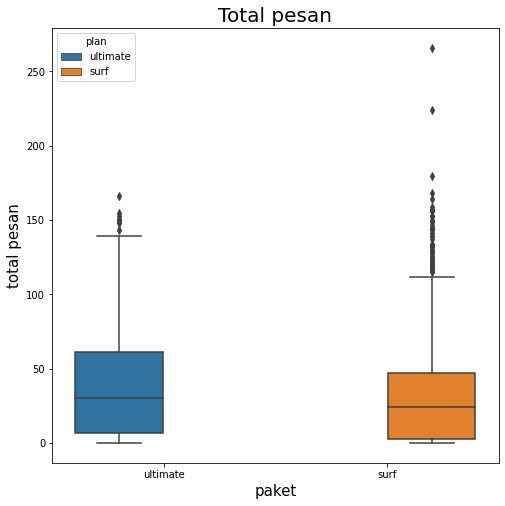

In [100]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=user_activity, x='plan', y='msg_count', hue='plan').set_title('Total pesan',fontdict={'size': 20})
ax.set_xlabel('paket',fontdict={'size': 15})
ax.set_ylabel('total pesan',fontdict={'size': 15})
plt.show()

Dari **boxplot** di atas didapatkan bahwa:
* Median atau nilai tengah dari kedua paket memiliki nilai yang hampir sama
* Total pesan terlalu terpusat pada jumlah yang kecil 
* Paket `ultimate` memiliki rentang interkuartil yang lebih besar
* Lebih banyak outlier pada paket `surf`

Dari **keseluruhan informasi pesan** di atas, diketahui bahwa:

* Jumlah rata-rata pesan terbanyak yang dikirimkan yaitu sebesar 45 pesan pada bulan Desember oleh pengguna paket `ultimate`
* Jumlah rata-rata pesan paling sedikit yang dikirimkan yaitu sebesar 16 pesan pada bulan Januari oleh pengguna paket `surf`
* Secara keseluruhan, rata-rata pesan terbanyak dikirimkan oleh pengguna `ultimate`

### Internet

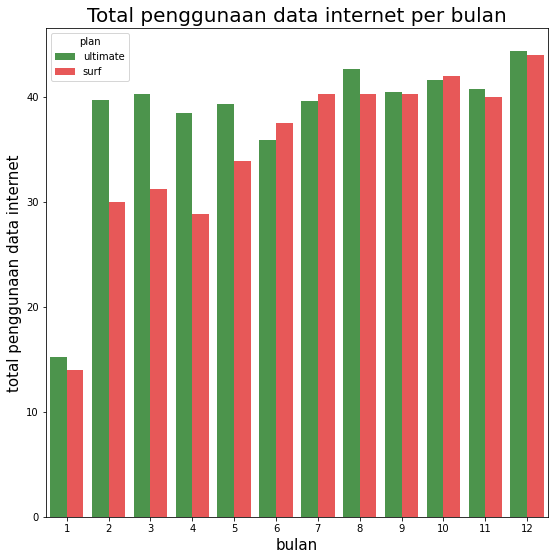

In [54]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=user_activity, x='month', y='data_used', hue='plan', ci=None, palette=['green','red'], alpha=0.75).set_title('Total penggunaan data internet per bulan',fontdict={'size': 20})
ax.set_xlabel('bulan',fontdict={'size': 15})
ax.set_ylabel('total penggunaan data internet',fontdict={'size': 15})
plt.show()

Dari diagram batang di atas diketahui bahwa:
* Semakin berjalannya bulan, penggunaan internet paket `ultimate` cenderung naik turun, sedangkan paket `surf` mengalami kenaikan yang tidak terlalu signifikan.
* Pengguna internet paket `ultimate` lebih tinggi dibandingkan paket `surf`.

In [55]:
user_activity.pivot_table(index='plan', columns='month',values=['data_used'], aggfunc=['mean'])

mean                                                        \
         data_used                                                         
month           1          2         3          4          5          6    
plan                                                                       
surf         14.00  30.000000  31.26087  28.880000  33.844156  37.515464   
ultimate     15.25  39.714286  40.25000  38.428571  39.310345  35.851064   

                                                                            
                                                                            
month            7          8          9          10         11         12  
plan                                                                        
surf      40.264463  40.277778  40.221649  41.987342  39.957597  43.949686  
ultimate  39.644068  42.619718  40.465116  41.556604  40.732283  44.377483

In [56]:
user_activity.pivot_table(index='plan',values=['data_used'], aggfunc=['mean'])

,mean
,data_used
plan,
surf,40.140496
ultimate,41.080556


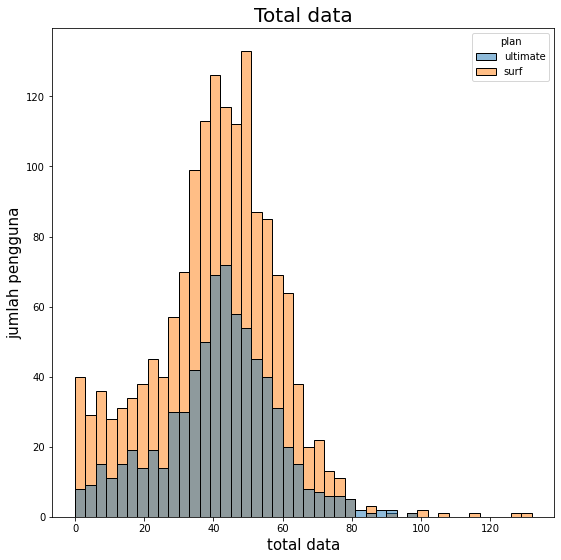

In [57]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.histplot(data=user_activity, x='data_used', hue='plan').set_title('Total data',fontdict={'size': 20})
ax.set_xlabel('total data',fontdict={'size': 15})
ax.set_ylabel('jumlah pengguna',fontdict={'size': 15})
plt.show()

Dari **histogram** di atas diketahui bahwa:
* Secara keseluruhan, kedua paket memiliki pola persebaran data yang hampir sama, dengan jumlah pengguna paket `surf` yang lebih tinggi karena penggunanya lebih banyak
* Lebih dari 120 orang pengguna paket `surf` menghabiskan paket data sekitar 50 gb 
* Tidak banyak nilai setelah nilai 80 gb

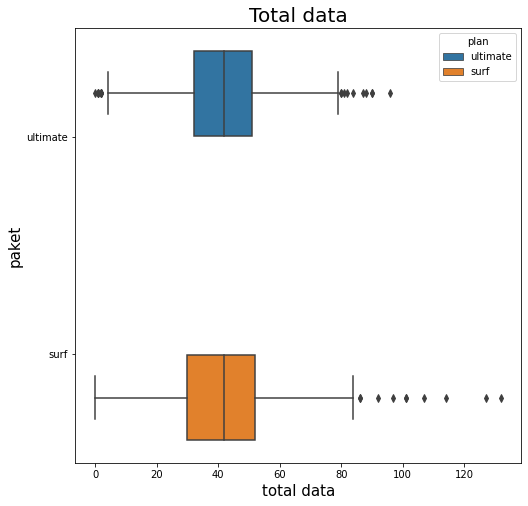

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=user_activity, x='data_used', y='plan', hue='plan').set_title('Total data',fontdict={'size': 20})
ax.set_xlabel('total data',fontdict={'size': 15})
ax.set_ylabel('paket',fontdict={'size': 15})
plt.show()

Dari **boxplot** di atas didapatkan bahwa:
* Median atau nilai tengah dari kedua paket memiliki nilai yang hampir sama
* Total data cenderung simetris
* Kedua paket memiliki rentang interkuartil yang relatif sama
* Outlier pada paket `surf` memiliki nilai yang lebih tinggi dibanding `ultimate`

Dari **keseluruhan informasi data internet** oleh kedua paket, diketahui bahwa:
* Ternyata pengguna paket menghabiskan paket internet yang lebih banyak yaitu sebesar 18gb pada bulan Maret dan Desember
* Penggunaan internet rendah yaitu pada bulan Januari oleh pengguna `surf`
* Secara keseluruhan, penggunaan data internet paket `ultimate` lebih tinggi

In [41]:
#informnasi mengenai rata-rata, variansi, dan standar deviasi dari durasi panggilan, total pesan dan total penggunaan data
user_activity.pivot_table(index='plan',values=['duration','msg_count','data_used'], aggfunc=['mean','std','var'])

mean                               std                         \
          data_used    duration  msg_count  data_used    duration  msg_count   
plan                                                                           
surf      40.140496  428.749523  31.159568  17.841862  234.453150  33.566717   
ultimate  41.080556  430.450000  37.551389  16.528701  240.508762  34.767179   

                 var                             
           data_used      duration    msg_count  
plan                                             
surf      318.332030  54968.279461  1126.724522  
ultimate  273.197952  57844.464812  1208.756744

Dari **informasi mengenai rata-rata, variansi, dan standar deviasi dari durasi panggilan, total pesan dan total penggunaan data** oleh kedua paket, diketahui bahwa:
* Secara keseluruhan, nilai rata-rata, variansi, dan standar deviasi dari durasi panggilan, total pesan dan total penggunaan data tidak memiliki perbedaan yang terlalu jauh


## Pendapatan

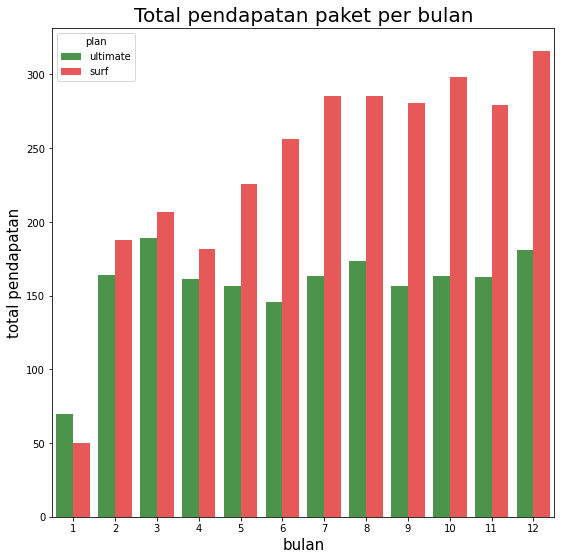

In [59]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(data=user_activity, x='month', y='monthly_revenue', hue='plan', ci=None, palette=['green','red'], alpha=0.75).set_title('Total pendapatan paket per bulan',fontdict={'size': 20})
ax.set_xlabel('bulan',fontdict={'size': 15})
ax.set_ylabel('total pendapatan',fontdict={'size': 15})
plt.show()

Dari diagram batang di atas diketahui bahwa:
* Pendapatan dari paket `surf` jauh lebih tinggi dibandingkan `ultimate`pada setiap bulannya.
* Semakin berjalannya bulan, pendapatan paket `ultimate` cukup stabil, sedangkan paket `surf`mengalami kenaikan yang tidak terlalu signifikan.

In [60]:
user_activity.pivot_table(index='plan', columns='month',values=['monthly_revenue'], aggfunc=['mean'])

mean                                             \
         monthly_revenue                                              
month                 1       2          3           4           5    
plan                                                                  
surf                50.0  187.73  206.81087  181.910600  225.810000   
ultimate            70.0  164.00  189.00000  161.333333  156.655172   

                                                                      \
                                                                       
month             6           7           8           9           10   
plan                                                                   
surf      256.389691  285.236033  285.474383  280.281804  298.417004   
ultimate  145.510638  163.254237  173.619718  156.197674  163.575472   

                                  
                                  
month             11          12  
plan                              
surf      279.276360  315.965849  
ultimate  162.377953  180.887417

In [61]:
mean_rev = user_activity.pivot_table(index='plan',values=['monthly_revenue'], aggfunc=['mean','var'])
mean_rev

,mean,var
,monthly_revenue,monthly_revenue
plan,,
surf,281.79986,26640.34178
ultimate,165.46250,7709.99581


In [62]:
user_activity.pivot_table(index='plan',values=['monthly_revenue'], aggfunc=['var','std'])

,var,std
,monthly_revenue,monthly_revenue
plan,,
surf,26640.34178,163.218693
ultimate,7709.99581,87.806582


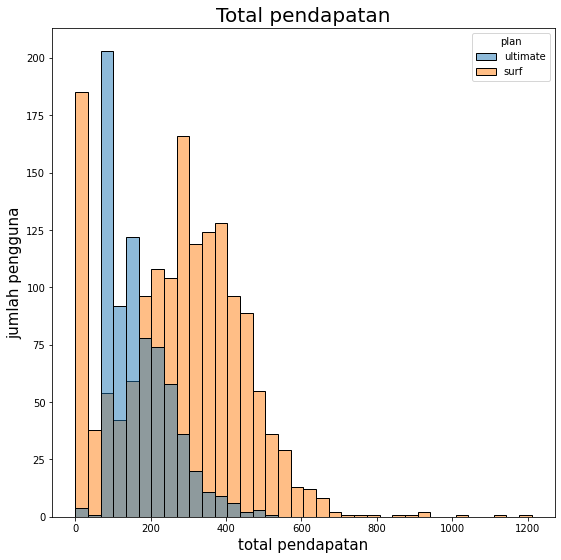

In [63]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.histplot(data=user_activity, x='monthly_revenue', hue='plan').set_title('Total pendapatan',fontdict={'size': 20})
ax.set_xlabel('total pendapatan',fontdict={'size': 15})
ax.set_ylabel('jumlah pengguna',fontdict={'size': 15})
plt.show()

Dari **histogram** di atas diketahui bahwa:
* Secara keseluruhan, total pendapatan paket `surf` jauh lebih tinggi dibandingkan `ultimate`
* Total pendapatan dari paket `ultimate` berkisar antara 70 - 500 dollar
* Tidak banyak nilai setelah 800 dollar

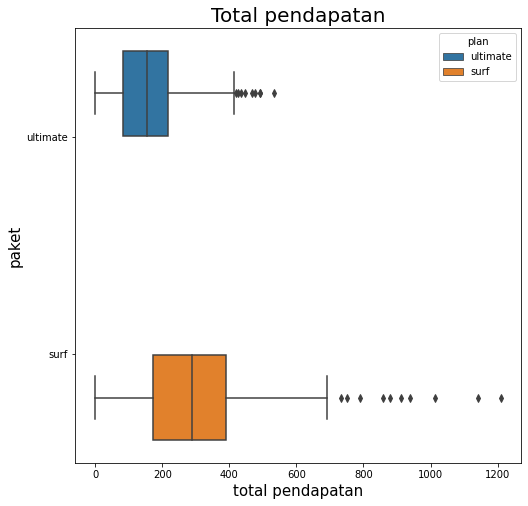

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=user_activity, x='monthly_revenue', y='plan', hue='plan').set_title('Total pendapatan',fontdict={'size': 20})
ax.set_xlabel('total pendapatan',fontdict={'size': 15})
ax.set_ylabel('paket',fontdict={'size': 15})
plt.show()

Dari **boxplot** di atas didapatkan bahwa:
* Paket `surf` memiliki nilai tengah yang lebih tinggi
* Paket `surf` memiliki rentang interkuartil yang lebih besar
* Outlier pada paket `surf` memiliki nilai yang lebih tinggi dibanding `ultimate`

In [101]:
#informnasi mengenai rata-rata, variansi, dan standar deviasi dari durasi panggilan, total pesan dan total penggunaan data
user_activity.pivot_table(index='plan',values=['monthly_revenue'], aggfunc=['mean','std','var'])

,mean,std,var
,monthly_revenue,monthly_revenue,monthly_revenue
plan,,,
surf,281.79986,163.218693,26640.34178
ultimate,165.46250,87.806582,7709.99581


Dari **informasi mengenai rata-rata, variansi, dan standar deviasi dari pendapatan** oleh kedua paket, diketahui bahwa:
* Secara keseluruhan, nilai rata-rata, variansi, dan standar deviasi dari pendapatan kedua paket memiliki jarak yang cukup jauh dengan rata-rata pendapatan paket `surf` yang lebih tinggi.


Dari **keseluruhan informasi pendapatan** kedua paket, diketahu bahwa:

* Pada bulan Januari, baik pengguna `surf` maupun `ultimate` masih menggunakan data internet, panggilan, dan pesan dalam batas paket yang diberikan atau tidak terkena charge karena melewati batas penggunaan.
* Rata-rata pendapatan tertinggi pada bulan Maret oleh paket `ultimate` senilai 75 dolar dan terendah senilai 20 dolar oleh paket `surf`
* Rata-rata pendapatan dari paket `surf` memiliki nilai yang lebih tinggi dari `ultimate` yaitu sebesar 282 dollar.

## Menguji Hipotesis Statistik

### Pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda

Sekarang kita akan menguji hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda. Kita akan menggunakan T Test 2 sample karena terdapat data `ultimate` dan `surf`

Sebelum melakukan uji hipotesis, kita akan menguji apakah varians antara kedua sampel sama atau tidak

In [103]:
#uji levene
st.levene(data_surf['monthly_revenue'], data_ultimate['monthly_revenue'])

LeveneResult(statistic=230.71540938754418, pvalue=1.0120871427771562e-49)

Dikarenakan p-value nya < dari nilai alpha yang akan digunakan (0.05) maka varians antara kedua sample akan dianggap berbeda

`H0` = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf `sama`.

`H1` = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf `berbeda`.

In [65]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(data_surf['monthly_revenue'], data_ultimate['monthly_revenue'], equal_var=False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha): 
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  2.93879194431623e-98
Kita menolak hipotesis nol


### Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Selanjutnya kita akan menguji hipotesis apakah pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

In [66]:
city_rev_same = user_activity.loc[user_activity['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA','monthly_revenue']
city_rev_diff= user_activity.loc[user_activity['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA','monthly_revenue']

In [104]:
#uji levene
st.levene(city_rev_same, city_rev_diff)

LeveneResult(statistic=1.3745703106885223, pvalue=0.24115008625716536)

Dikarenakan p-value nya < dari nilai alpha yang akan digunakan (0.05) maka varians antara kedua sample akan dianggap berbeda

`H0` = Rata-rata pendapatan dari pengguna di wilayah NY-NJ `sama` dengan pendapatan pengguna dari wilayah lain.

`H1` = Rata-rata pendapatan dari pengguna di wilayah NY-NJ `berbeda` dengan pendapatan pengguna dari wilayah lain.

In [67]:
# Uji hipotesisnya
alpha = 0.05
results = st.ttest_ind(city_rev_same, city_rev_diff, equal_var=False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha): 
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.004094757135076342
Kita menolak hipotesis nol


* Hasil uji hipotesis pertama menyatakan bahwa kita **tidak bisa menolak hipotesis** bahwa **pendapatan rata-rata** dari pengguna paket prabayar `Ultimate` dan `Surf` **berbeda**
* Hasil uji hipotesis kedua menyatakan bahwa kita **tidak bisa menolak hipotesis** bahwa **pendapatan rata-rata** dari pengguna di `wilayah NY-NJ` **berbeda** dengan pendapatan pengguna dari wilayah lain

## Kesimpulan Umum

Kesimpulan dari keseluruhan proyek ini yaitu:

**1. Pra-Pemrosesan Data**

* Tidak ada data yang terduplikasi
* Terdapat beberapa data yang harus diubah ke tipe tertentu misalnya dari objek ke `datetime`
* Membuat beberapa kolom baru seperti kolom bulan dan membulatkan beberapa data tertentu agar memudahkan analisis data

**2. Analisis Data Eksploratif**

* Bulan Januari memiliki jumlah **total panggilan** yang paling sedikit dibanding bulan lainnya.
* Semakin berjalannya bulan, total panggilan juga semakin banyak
* Rata-rata **durasi panggilan** yang dilakukan pengguna paket `surf` pada bulan Desember merupakan yang tertinggi dan terendah yaitu pengguna paket `ultimate` pada bulan Januari
* Semakin berjalannya bulan, **jumlah pesan** yang dikirim meningkat
* Pengguna paket `ultimate` mengirimkan lebih banyak pesan dibandingkan pengguna paket `surf`
* Semakin berjalannya bulan, penggunaan **data internet** paket `ultimate` cenderung naik turun, sedangkan paket `surf` mengalami kenaikan yang tidak terlalu signifikan.
* Pengguna data internet paket `ultimate` lebih tinggi dibandingkan paket `surf`.
* Semakin berjalannya bulan, pendapatan paket `ultimate` cukup stabil, sedangkan paket `surf` mengalami kenaikan yang tidak terlalu signifikan.
* Pendapatan dari paket `surf` lebih tinggi dibandingkan `ultimate` dengan rata-rata pendapatan sebesar 282 dollar.


**3. Analisis Data Statistik**
* Terdapat **perbedaan** pendapatan rata-rata dari pengguna paket prabayar `Ultimate` dan `Surf`
* Terdapat **perbedaan** pendapatan rata-rata dari pengguna di **wilayah NY-NJ** dengan wilayah lainnya


<div class="alert alert-danger">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

- Tambahkan Analisis Data Statistik yaa
</div>

<div class="alert alert-success">
<b>Fachri's comment v.2</b> <a class="tocSkip"></a>

Nice. Good Job! Akan ku approve dulu tapi nanti tambahkan analisis data statistik yaa zahra
</div>